# As 5 diferenças importantes entre AdaBoost e Gradient Boosting Machine (GBM):
## **1. Função de Perda:**
- AdaBoost: Usa uma função de perda exponencial.
- GBM: Pode usar várias funções de perda (por exemplo, quadrática para regressão, logarítmica para classificação).
## **2. Atualização do Modelo:**
- AdaBoost: Atualiza os pesos das amostras mal classificadas.
- GBM: Atualiza o modelo ajustando-se aos resíduos (erros) do modelo anterior.
## **3. Flexibilidade:**
- AdaBoost: Geralmente usa "stumps" (árvores de decisão com profundidade 1) como classificadores fracos.
- GBM: Tipicamente usa árvores mais profundas, oferecendo maior flexibilidade.
## **4. Sensibilidade a Outliers:**
- AdaBoost: Mais sensível a outliers e ruído devido à ponderação exponencial.
- GBM: Geralmente mais robusto a outliers, dependendo da função de perda escolhida.
## **5. Velocidade de Convergência:**
- AdaBoost: Pode convergir mais rapidamente em alguns casos, especialmente para problemas mais simples.
- GBM: Geralmente converge mais lentamente, mas pode alcançar um desempenho melhor em problemas complexos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import accuracy_score, mean_squared_error

In [2]:
# Exemplo de Classificação
print("Exemplo de Classificação com GBM")

Exemplo de Classificação com GBM


In [3]:
# Gerando um conjunto de dados de classificação
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=5, n_classes=2, random_state=42)

In [4]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Criando e treinando o modelo GBM para classificação
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [6]:
# Fazendo previsões
y_pred = gb_clf.predict(X_test)

In [7]:
# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do GBM (Classificação): {accuracy:.4f}")

Acurácia do GBM (Classificação): 0.9250


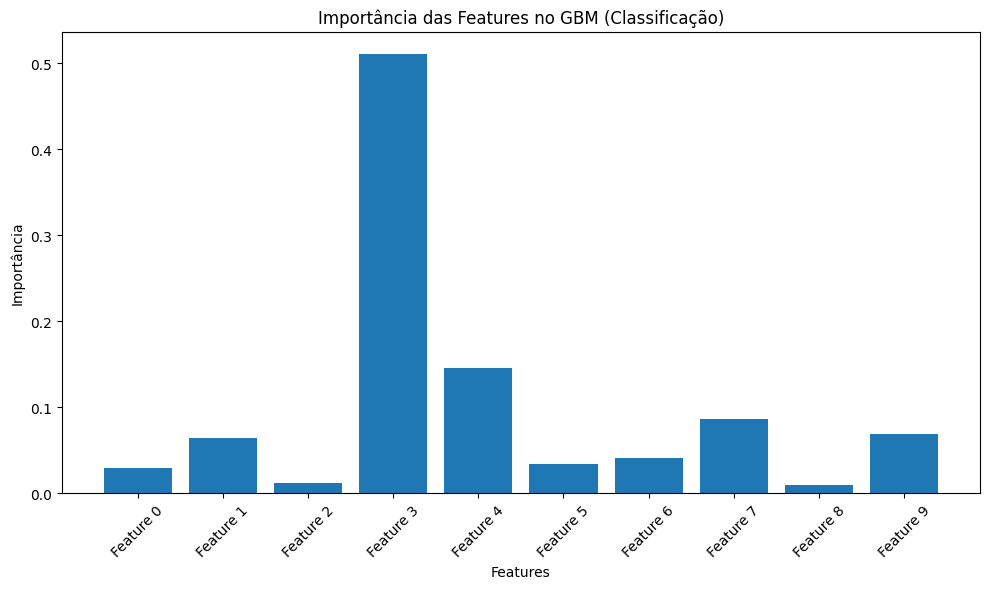

In [8]:
# Plotando a importância das features para classificação
feature_importance = gb_clf.feature_importances_
feature_names = [f"Feature {i}" for i in range(X.shape[1])]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title("Importância das Features no GBM (Classificação)")
plt.xlabel("Features")
plt.ylabel("Importância")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
# Exemplo de Regressão
print("\nExemplo de Regressão com GBM")


Exemplo de Regressão com GBM


In [10]:
# Gerando um conjunto de dados de regressão
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

In [11]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Criando e treinando o modelo GBM para regressão
gb_reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_reg.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [13]:
# Fazendo previsões
y_pred = gb_reg.predict(X_test)


In [14]:
# Calculando o erro quadrático médio
mse = mean_squared_error(y_test, y_pred)
print(f"Erro Quadrático Médio do GBM (Regressão): {mse:.4f}")

Erro Quadrático Médio do GBM (Regressão): 1234.7530


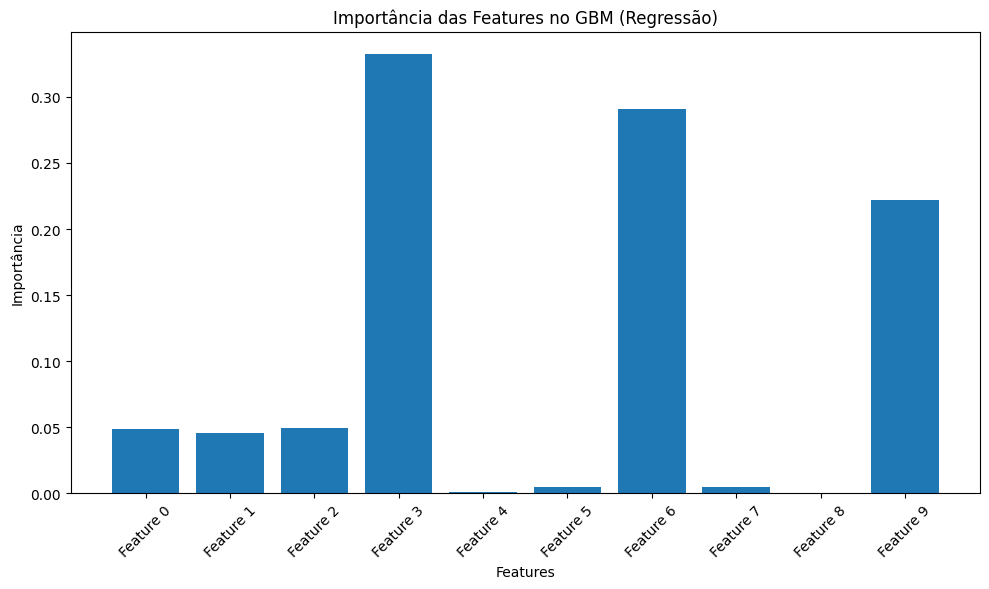

In [15]:
# Plotando a importância das features para regressão
feature_importance = gb_reg.feature_importances_
feature_names = [f"Feature {i}" for i in range(X.shape[1])]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importance)
plt.title("Importância das Features no GBM (Regressão)")
plt.xlabel("Features")
plt.ylabel("Importância")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

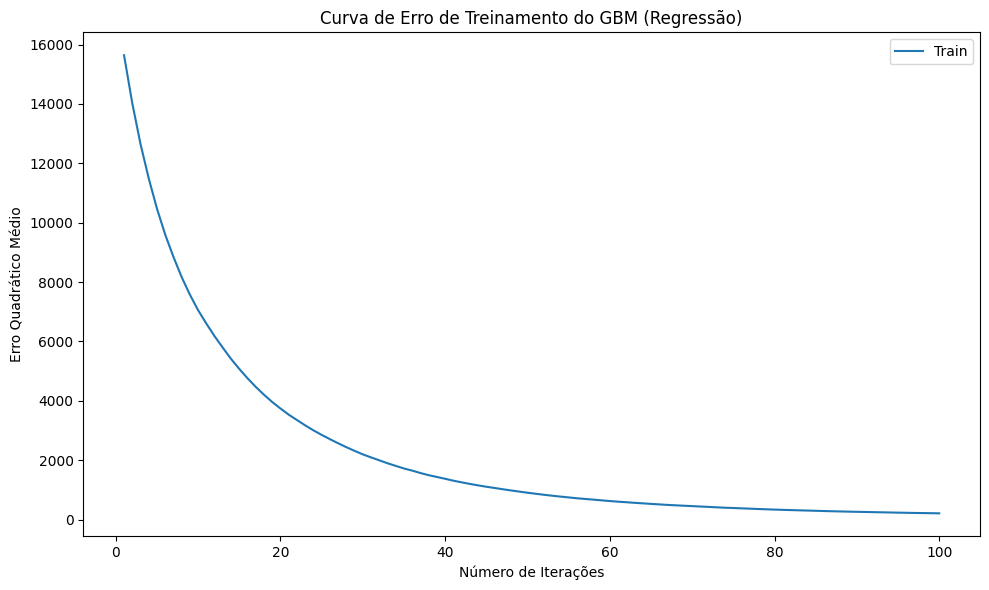

In [16]:
# Plotando a curva de erro de treinamento para regressão
train_scores = np.zeros((100,), dtype=np.float64)
for i, y_pred in enumerate(gb_reg.staged_predict(X_train)):
    train_scores[i] = mean_squared_error(y_train, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(100) + 1, train_scores, label='Train')
plt.title("Curva de Erro de Treinamento do GBM (Regressão)")
plt.xlabel("Número de Iterações")
plt.ylabel("Erro Quadrático Médio")
plt.legend()
plt.tight_layout()
plt.show()

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.datasets import make_classification, make_regression
from sklearn.metrics import accuracy_score, mean_squared_error

In [18]:
# Exemplo de Classificação
print("GridSearch para GBM - Classificação")


GridSearch para GBM - Classificação


In [19]:
# Gerando um conjunto de dados de classificação
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=5, n_classes=2, random_state=42)


In [20]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Criando o modelo GBM para classificação
gb_clf = GradientBoostingClassifier(random_state=42)

In [25]:
# Definindo o grid de parâmetros para busca
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'ccp_alpha': [0.01, 0.1]
}

In [23]:
# Criando o objeto GridSearchCV para classificação
grid_search_clf = GridSearchCV(gb_clf, param_grid_clf, cv=5, scoring='accuracy', n_jobs=-1)

In [34]:
# Realizando a busca em grade para classificação
grid_search_clf = GridSearchCV(gb_clf, param_grid, cv=3)

# Adicione a chamada do método fit aqui:
grid_search_clf.fit(X_train, y_train)

# Imprimindo os melhores parâmetros encontrados para classificação
print("Melhores parâmetros encontrados (Classificação):")
print(grid_search_clf.best_params_)

Melhores parâmetros encontrados (Classificação):
{'ccp_alpha': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [35]:
# Avaliando o melhor modelo de classificação
best_clf = grid_search_clf.best_estimator_
y_pred_clf = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_clf)
print(f"Acurácia do melhor modelo (Classificação): {accuracy:.4f}")


Acurácia do melhor modelo (Classificação): 0.8750


In [36]:
# Exemplo de Regressão
print("\nGridSearch para GBM - Regressão")


GridSearch para GBM - Regressão


In [37]:
# Gerando um conjunto de dados de regressão
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

In [38]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Criando o modelo GBM para regressão
gb_reg = GradientBoostingRegressor(random_state=42)

In [49]:
# Defina a grade de hiperparâmetros
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.01, 0.1]
}

In [52]:
# Criando o objeto GridSearchCV para regressão
grid_search_reg = GridSearchCV(gb_reg, param_grid, cv=3, n_jobs=-1, verbose=2)

In [53]:
# Realizando a busca em grade para regressão
grid_search_reg.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.01, 0.1], 'max_depth': [3, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [54]:
# Imprimindo os melhores parâmetros encontrados para regressão
print("Melhores parâmetros encontrados (Regressão):")
print(grid_search_reg.best_params_)

Melhores parâmetros encontrados (Regressão):
{'ccp_alpha': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [55]:
# Avaliando o melhor modelo de regressão
best_reg = grid_search_reg.best_estimator_
y_pred_reg = best_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_reg)
print(f"Erro Quadrático Médio do melhor modelo (Regressão): {mse:.4f}")

Erro Quadrático Médio do melhor modelo (Regressão): 1239.7375


# A principal diferença entre o Gradient Boosting Machine (GBM) tradicional e o Stochastic Gradient Boosting Machine (SGBM), conforme proposto por Jerome Friedman no artigo "Stochastic Gradient Boosting" (1999), está na introdução de aleatoriedade no processo de treinamento. Especificamente:

## **1.0 Subamostragem dos dados:**
- GBM tradicional: Usa todos os dados de treinamento em cada iteração.
- SGBM: Em cada iteração, utiliza apenas uma fração aleatória dos dados de treinamento.

# Esta diferença fundamental tem várias implicações:
## **1.1 Redução de overfitting: A subamostragem aleatória ajuda a reduzir o overfitting, pois cada árvore é treinada em um subconjunto diferente dos dados.**
## **2.1 Melhoria na generalização: Ao introduzir variabilidade no processo de treinamento, o SGBM tende a generalizar melhor para dados não vistos.**
## **3.1 Eficiência computacional: O SGBM é geralmente mais rápido, pois trabalha com subconjuntos menores dos dados em cada iteração.**
## **4.1 Regularização implícita: A aleatoriedade atua como uma forma de regularização, ajudando o modelo a evitar se ajustar demais a peculiaridades específicas do conjunto de treinamento.**
## **5.1 Robustez a outliers: A subamostragem pode tornar o modelo mais robusto a outliers, pois nem todas as amostras são usadas em cada iteração.**

# É importante notar que muitas implementações modernas de GBM, incluindo bibliotecas populares como XGBoost, LightGBM e CatBoost, incorporam aspectos do SGBM em seus algoritmos, tornando a distinção menos clara na prática atual de machine learning.